In [1]:
import numpy as np
import pandas as pd
import time
import datetime

In [4]:
data = pd.read_csv('../data_processing/worldweatheronline.com/result_data.csv')

In [5]:
table0 = data[['date', 'time', 'tempC']]
table1 = data[['date', 'time', 'tempC']]

In [6]:
table0 = table0.loc[(table0['time'] == 1200)]

In [7]:
table0['date'] = pd.to_datetime(table0['date'])
table1['date'] = pd.to_datetime(table1['date'])
table0.set_index('date', inplace=True, drop=True)
table1.set_index('date', inplace=True, drop=True)

/var/folders/yc/jct8g08s4pdfb9kr_t5r7m8r0000gq/T/ipykernel_91376/3471227955.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table1['date'] = pd.to_datetime(table1['date'])


In [8]:
table1

,time,tempC
date,,
2009-04-01,0,0
2009-04-01,1200,2
2009-04-02,0,0
2009-04-02,1200,1
2009-04-03,0,-3
...,...,...
2022-03-16,0,-6
2022-03-16,1200,-4
2022-03-17,0,-7


In [9]:
table0 = table0['tempC']

In [10]:
df = data[['date', 'time', 'tempC']]
df1 = data[['date', 'time', 'tempC']]
#df.set_index('date', inplace=True, drop=False)
df = df.loc[(df['time'] == 1200)]
df['day'] = [time.strptime(n, "%Y-%m-%d").tm_mday for n in df['date']]
df['month'] = [time.strptime(n, "%Y-%m-%d").tm_mon for n in df['date']]
df['year'] = [time.strptime(n, "%Y-%m-%d").tm_year for n in df['date']]
df1['day'] = [time.strptime(n, "%Y-%m-%d").tm_mday for n in df1['date']]
df1['month'] = [time.strptime(n, "%Y-%m-%d").tm_mon for n in df1['date']]
df1['year'] = [time.strptime(n, "%Y-%m-%d").tm_year for n in df1['date']]
df1['status1'] = [1 if n >= 12 else 0 for n in df1['time']]
df1['status2'] = [1 if n == 0 else 0 for n in df1['time']]
df['date'] = pd.to_datetime(df['date'])
df1['date'] = pd.to_datetime(df1['date'])
X1_train =  df.drop(['tempC', 'date', 'time'], axis='columns')[0:df.shape[0]-473]
X1_test = df.drop(['tempC', 'date', 'time'], axis='columns')[df.shape[0]-473:]
y1_train = df[['tempC']][0:df.shape[0]-473]
y1_test = df[['tempC']][df.shape[0]-473:]
X11_train =  df1.drop(['tempC', 'date', 'time'], axis='columns')[0:df1.shape[0]-473]
X11_test = df1.drop(['tempC', 'date', 'time'], axis='columns')[df1.shape[0]-473:]
y11_train = df1[['tempC']][0:df.shape[0]-473]
y11_test = df1[['tempC']][df.shape[0]-473:]
#print(df.drop([''], axis='columns'))

/var/folders/yc/jct8g08s4pdfb9kr_t5r7m8r0000gq/T/ipykernel_91376/1922725303.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['day'] = [time.strptime(n, "%Y-%m-%d").tm_mday for n in df1['date']]
/var/folders/yc/jct8g08s4pdfb9kr_t5r7m8r0000gq/T/ipykernel_91376/1922725303.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['month'] = [time.strptime(n, "%Y-%m-%d").tm_mon for n in df1['date']]
/var/folders/yc/jct8g08s4pdfb9kr_t5r7m8r0000gq/T/ipykernel_91376/1922725303.py:10: SettingWithCopyWarning: 
A

In [11]:
df.shape

(4734, 6)

In [12]:
df1.shape

(9469, 8)

In [13]:
X1_train.values

array([[   1,    4, 2009],
       [   2,    4, 2009],
       [   3,    4, 2009],
       ...,
       [  27,   11, 2020],
       [  28,   11, 2020],
       [  29,   11, 2020]])

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

def visio(y1_train, y1_test, y_pred):

    plt.figure(figsize=(12,8))
    plt.plot(y1_train, label = 'Train')
    plt.plot(y1_test, label = 'Test')
    plt.plot(y_pred, label = 'Pred')
    plt.legend(loc='best')
    plt.savefig('graph.png')
    plt.show()
    

55.035940803382665


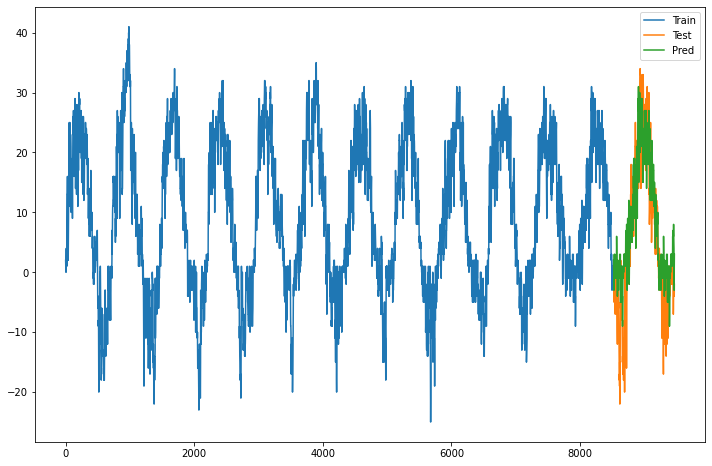

In [18]:
from sklearn import metrics, tree

clf = tree.DecisionTreeRegressor(random_state=1)
clf.fit(X1_train, y1_train)
reg_tree_pred = clf.predict(X1_test)
rmse = (metrics.mean_squared_error(y1_test, reg_tree_pred))
print(rmse)

y_pred = pd.DataFrame.copy(y1_test)
y_pred['tempC'] = reg_tree_pred

visio(y1_train, y1_test, y_pred)

/opt/homebrew/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


6.306871299858841 - rmse; 39.776625592983144 - mse


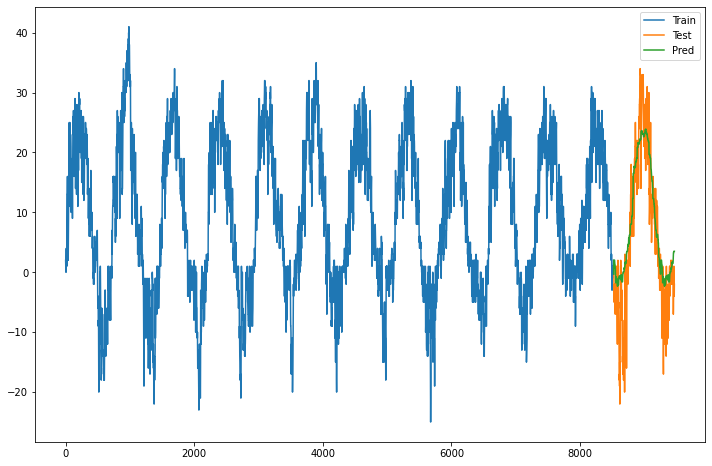

In [19]:
from sklearn.ensemble import GradientBoostingRegressor
from math import sqrt

boost_clf = GradientBoostingRegressor(random_state=0)
boost_clf.fit(X1_train, y1_train)
boost_pred = boost_clf.predict(X1_test)

rmse = sqrt(metrics.mean_squared_error(y1_test, boost_pred))
print(rmse,'- rmse;', rmse**2, '- mse')

y_pred = pd.DataFrame.copy(y1_test)
y_pred['tempC'] = boost_pred

visio(y1_train, y1_test, y_pred)

In [30]:
import sklearn.external.joblib as extjoblib
import joblib

joblib.dump(boost_clf, 'method.pkl')

ModuleNotFoundError: No module named 'sklearn.external'

In [13]:
_joblib = joblib.load('method.pkl')

In [38]:
round(float(_joblib.predict([[8, 5, 2020]])), 2)

18.26

/home/dmitry/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


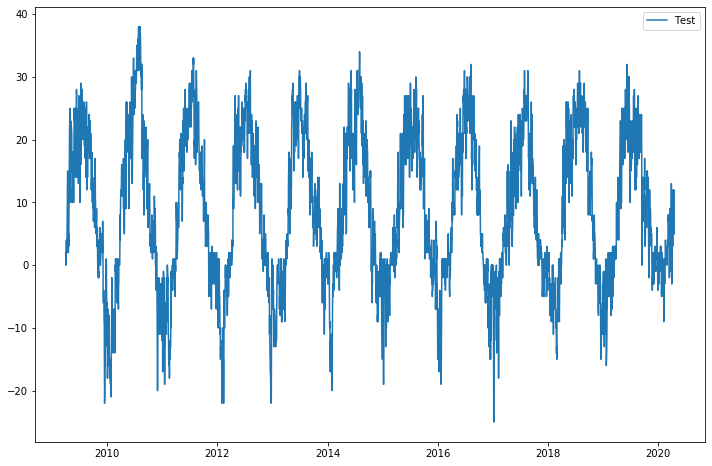

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline


plt.figure(figsize=(12,8))
#plt.plot(y1_train, label = 'Train')
plt.plot(table0, label = 'Test')
plt.legend(loc='best')
plt.show()

In [84]:
y_train = table0[:table0.shape[0]-473]
y_test = table0[table0.shape[0]-473:]

In [ ]:
y_train

In [78]:
#Max = table0.resample('MS').mean()

In [79]:
#y_train = Max[:Max.shape[0]-15]
#y_test = Max[Max.shape[0]-15:]

In [17]:
from statsmodels.tsa.arima_model import ARIMA, ARMA
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima

In [177]:
#x = np.arange(0, 100, 1)
#y = x**2
#y_pred = pd.DataFrame.copy(y_train[0:100])
#d = pd.DataFrame({'date':y_pred.index, 'temp':y_pred.values})
#d.set_index('date', inplace=True, drop=False)
#d['temp'] = y
#y_t = d['temp'][0:70]
#y_t

In [178]:
#нужно выбрать m=12, но считается очень долго
stepwise_model = auto_arima(y_train, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
#                            d=1, D=1,
                            trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

print(stepwise_model.aic())

'''
# use auto_arima to find the optimum order and seasona_order
stepwise_model = auto_arima(train, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
#                            d=1, D=1,
                            trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

'''

Performing stepwise search to minimize aic
Fit ARIMA(1,0,1)x(0,0,1,12) [intercept=True]; AIC=18447.716, BIC=18478.607, Time=6.010 seconds
Fit ARIMA(0,0,0)x(0,0,0,12) [intercept=True]; AIC=28047.404, BIC=28059.761, Time=0.062 seconds
Fit ARIMA(1,0,0)x(1,0,0,12) [intercept=True]; AIC=18488.635, BIC=18513.347, Time=6.548 seconds
Fit ARIMA(0,0,1)x(0,0,1,12) [intercept=True]; AIC=22932.254, BIC=22956.966, Time=5.994 seconds
Fit ARIMA(0,0,0)x(0,0,0,12) [intercept=False]; AIC=29560.820, BIC=29566.998, Time=0.040 seconds
Fit ARIMA(1,0,1)x(0,0,0,12) [intercept=True]; AIC=18445.731, BIC=18470.443, Time=0.852 seconds
Fit ARIMA(1,0,1)x(1,0,0,12) [intercept=True]; AIC=18447.715, BIC=18478.606, Time=7.913 seconds
Fit ARIMA(1,0,1)x(1,0,1,12) [intercept=True]; AIC=18446.782, BIC=18483.851, Time=19.199 seconds
Fit ARIMA(0,0,1)x(0,0,0,12) [intercept=True]; AIC=24366.304, BIC=24384.839, Time=0.514 seconds
Fit ARIMA(1,0,0)x(0,0,0,12) [intercept=True]; AIC=18486.635, BIC=18505.169, Time=0.298 seconds
Fit A

"\n# use auto_arima to find the optimum order and seasona_order\nstepwise_model = auto_arima(train, start_p=1, start_q=1,\n                           max_p=3, max_q=3, m=12,\n                           start_P=0, seasonal=True,\n#                            d=1, D=1,\n                            trace=True,\n                           error_action='ignore',  \n                           suppress_warnings=True, \n                           stepwise=True)\nprint(stepwise_model.aic())\n\n"

In [19]:
stepwise_model.fit(y_train)

ARIMA(maxiter=50, method='lbfgs', order=(2, 0, 2), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

In [22]:
forecast = stepwise_model.predict(start = '2017-01-01', end = '2021-01-01')

TypeError: predict() got an unexpected keyword argument 'start'

In [159]:
#(1, 1, 1), (1, 0, 0, 12)
#(2,1,1)x(0,1,1,12)
#(2,2,1)x(0,1,1,12)
model = SARIMAX(y_train, order=(2, 1, 4),
               seasonal_order=(0, 1, 1, 7), 
               enforce_stationarity=True,
               enforce_invertibility=True).fit()

In [160]:
pred = model.predict(start = '2018-01-01', end = '2021-01-01')

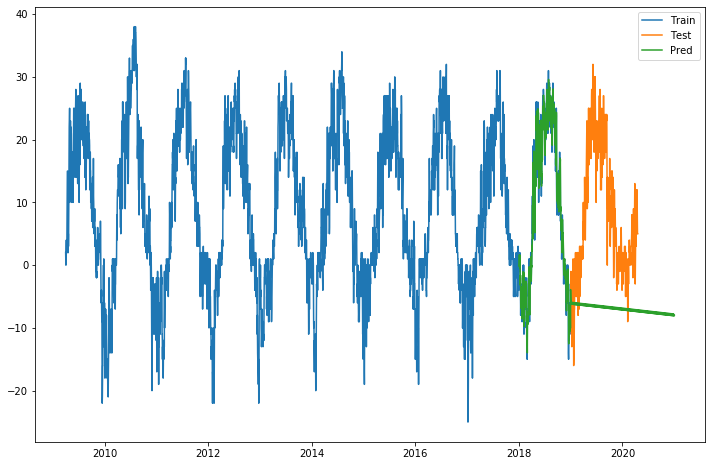

In [161]:
plt.figure(figsize=(12,8))
plt.plot(y_train, label = 'Train')
plt.plot(y_test, label = 'Test')
plt.plot(pred, label = 'Pred')
plt.legend(loc='best')
plt.show()

/home/dmitry/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


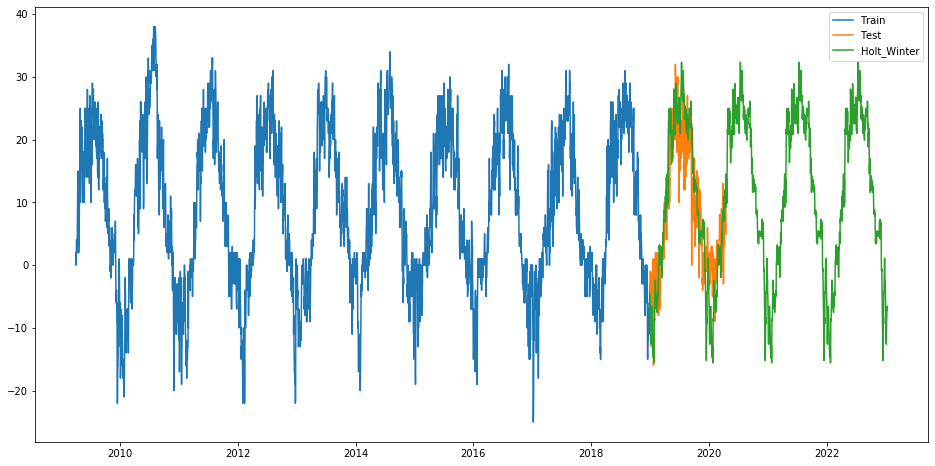

6.022413177161589 - rmse; 36.269460476449545 - mse


In [176]:
#https://www.statsmodels.org/dev/generated/statsmodels.tsa.holtwinters.ExponentialSmoothing.html

from statsmodels.tsa.api import ExponentialSmoothing

y_hat_avg = y_test.copy()
fit1 = ExponentialSmoothing(y_train ,seasonal_periods=365 , seasonal='add').fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(y_test)+1000)
plt.figure(figsize=(16,8))
plt.plot(y_train, label='Train')
plt.plot(y_test, label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

rmse = sqrt(metrics.mean_squared_error(y_test, y_hat_avg['Holt_Winter'][:len(y_test)]))
print(rmse,'- rmse;', rmse**2, '- mse')

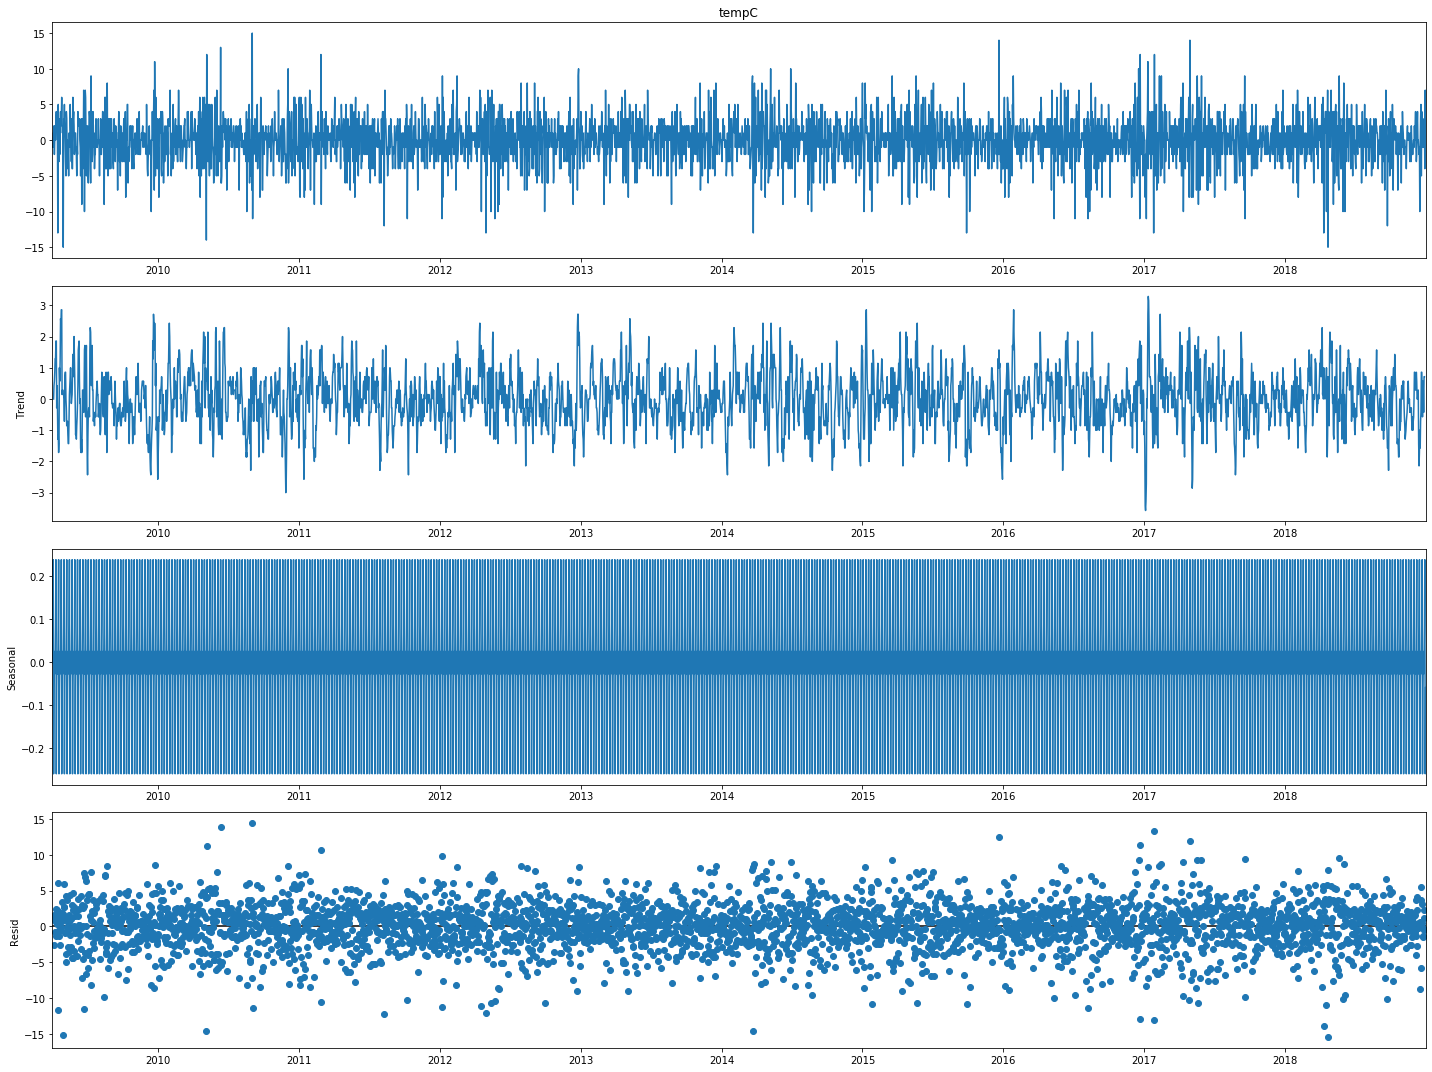

In [113]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
import warnings

decompose = seasonal_decompose(y_train.diff().dropna(), model='additive')
plt.rc("figure", figsize=(20,15))
decompose.plot()
None

In [114]:
dftest = adfuller(decompose.resid.dropna(), autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput.round(4))
# p-value < 0.05 => reject H0

Test Statistic                  -25.3000
p-value                           0.0000
Lags Used                        30.0000
Number of Observations Used    3524.0000
Critical Value (1%)              -3.4322
Critical Value (5%)              -2.8624
Critical Value (10%)             -2.5672
dtype: float64


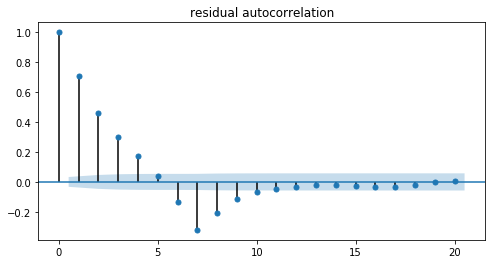

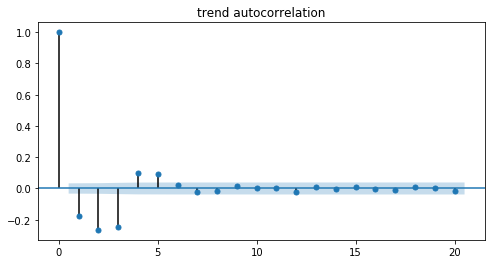

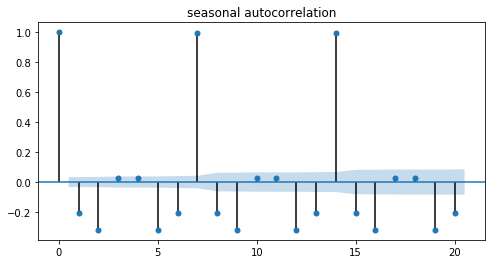

In [115]:
trend_stats = pd.DataFrame(decompose.trend).iloc[6:-6, :] 
resid_stats = pd.DataFrame(decompose.resid).iloc[6:-6, :] 
season_stats = pd.DataFrame(decompose.seasonal).iloc[6:-6, :] 

decomposition = [trend_stats, resid_stats, season_stats]
for i, j in enumerate(decomposition):
    plt.rc("figure", figsize=(8,4))
    plot_acf(j, lags=20)
    if i==0:
        plt.title('residual autocorrelation')
    elif i==1:
        plt.title('trend autocorrelation')
    else:
        plt.title('seasonal autocorrelation')
    plt.savefig(f'Autocorrelation_{i}.jpg')

# Plotting the autocorrelation -> the data shows clear seasonal pattern which is not surprising as it is climate data

In [142]:
y_train.index = pd.DatetimeIndex(y_train.index.values, freq=y_train.index.inferred_freq)
pred = y_test.copy()
model = sm.tsa.statespace.SARIMAX(y_train, 
                                 order=(2, 1, 25),
                                 seasonal_order=(0,0,1,50),
                                 enforce_stationarity=False,
                                 enforce_invertibility=False)
result = model.fit()
forecast = result.forecast(steps = 1000)
pred['SARIMAX'] = result.predict(start="2009-05-1", end="2021-01-01")
plt.figure(figsize=(16,8))
plt.plot(y_train, label='Train')
plt.plot(y_test, label='Test')
plt.plot(pred['SARIMAX'], label='SARIMAX')
plt.legend(loc='best')
plt.title('Full test set forecast')
plt.figure('Forecast.png')

KeyboardInterrupt: 

<Figure size 576x288 with 0 Axes>

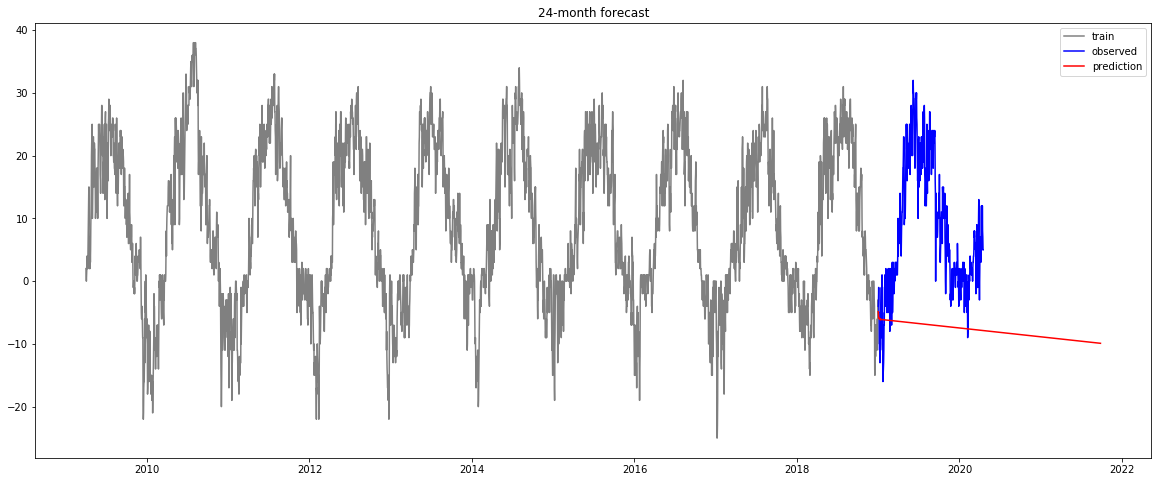

<Figure size 576x288 with 0 Axes>

In [130]:
f5 = plt.figure(figsize=(20,8))
plt.plot(y_train.index, y_train, color='grey', label='train') 
plt.plot(y_test.index, y_test, color='blue', label='observed')
plt.plot(forecast.index, forecast, color='red', label='prediction') 
plt.title('24-month forecast')
plt.legend(loc='best')
plt.figure('Forecast_2years.png')